In [13]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
import csv
import pandas as pd
import seaborn as sns

In [22]:
workspace_dir = Path("/home/srs-9/Projects/ms_mri")
workdir = workspace_dir / "training_work_dirs" / "cp_work_dir21"
n_folds = 4

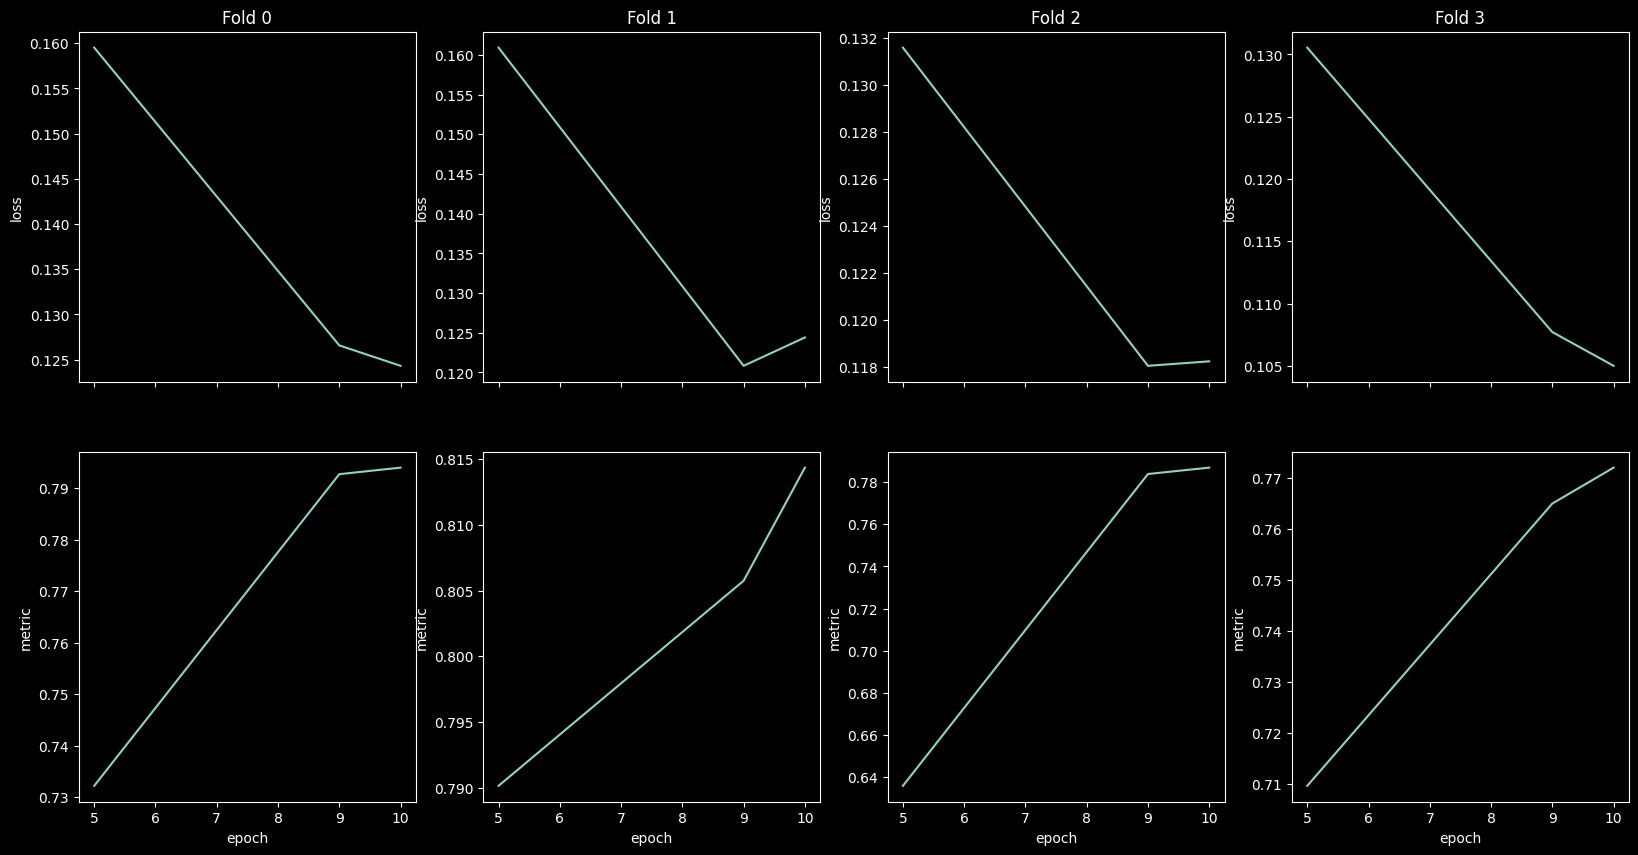

In [44]:
# don't know how to share y axis for each row without the y range being the same across rows
n_folds = 4
fig, axes = plt.subplots(2, n_folds, figsize=(5*n_folds, 10), sharex=True)
for i in range(n_folds):
    model_dir = workdir / f"swinunetr_{i}"
    accuracy_hist_file = model_dir / f"model_fold{i}" / "accuracy_history.csv"
    df = pd.read_csv(accuracy_hist_file, sep="\t")
    axes[0,i].set_title(f"Fold {i}")
    sns.lineplot(data=df, x="epoch", y="loss", ax=axes[0,i])
    sns.lineplot(data=df, x="epoch", y="metric", ax=axes[1,i])

In [52]:
dfs = []
for i in range(n_folds):
    model_dir = workdir / f"swinunetr_{i}"
    accuracy_hist_file = model_dir / f"model_fold{i}" / "accuracy_history.csv"
    dfs.append(pd.read_csv(accuracy_hist_file, sep="\t"))

df_concat = pd.concat(dfs)
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
print(df_means.head())

   epoch    metric      loss       lr    time    iter
0    5.0  0.717000  0.145643  0.00028   6.750   750.0
1    9.0  0.786822  0.118295  0.00007  12.425  1350.0
2   10.0  0.791805  0.117993  0.00003  14.975  1500.0


Text(0.5, 1.0, 'Dice Score')

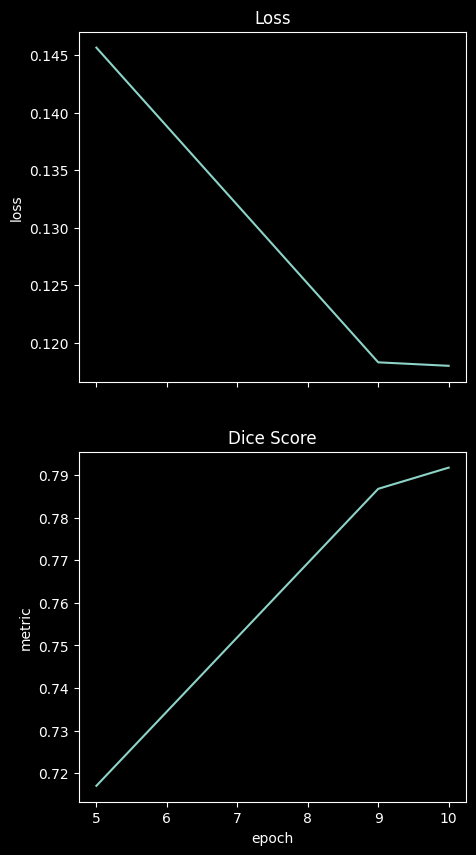

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(5, 10), sharex=True)
sns.lineplot(data=df_means, x="epoch", y="loss", ax=axes[0])
axes[0].set_title("Loss")
sns.lineplot(data=df_means, x="epoch", y="metric", ax=axes[1])
axes[1].set_title("Dice Score")

In [56]:
dfs[0]

,epoch,metric,loss,lr,time,iter
0,5,0.73224,0.15952,0.00028,6.8,750
1,9,0.79275,0.12657,0.00007,12.5,1350
2,10,0.79402,0.12431,0.00003,15.0,1500
